In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


# Problem formulation

- Multi scatter plot (check)
- Feature scoring (check)
- Scenario discovery (PRIM) (selecteren juiste box, peeling alfa = default & threshold = 0.8)
- Dimensional stacking (op basis van resultaten ws meer runs nodig)

In [4]:
experiments = pd.read_csv('data/output_data/experiments_2000s_0p.csv')
outcomes = pd.read_csv('data/output_data/outcomes_2000s_0p.csv')

experiments = experiments.drop(columns='Unnamed: 0')
outcomes = outcomes.drop(columns='Unnamed: 0')
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,110,334.008648,10.0,0.729263,259.565899,10.0,0.673660,104.948965,10.0,0.550382,...,0,0,0,0,0,0,0,0,policy 0,dikesnet
1,56,158.582973,10.0,0.641079,327.393379,1.0,0.330776,253.114312,1.5,0.109510,...,0,0,0,0,0,0,0,1,policy 0,dikesnet
2,80,299.733430,10.0,0.184624,281.087283,1.0,0.481512,105.280240,1.0,0.930467,...,0,0,0,0,0,0,0,2,policy 0,dikesnet
3,61,151.914404,1.5,0.153804,176.530917,10.0,0.630006,272.552747,10.0,0.762337,...,0,0,0,0,0,0,0,3,policy 0,dikesnet
4,80,309.749958,1.0,0.422138,307.063572,10.0,0.217711,331.690263,1.5,0.705076,...,0,0,0,0,0,0,0,4,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,24,219.930246,1.0,0.891368,275.617704,10.0,0.423842,30.879098,10.0,0.889828,...,0,0,0,0,0,0,0,19995,policy 0,dikesnet
19996,26,192.896909,10.0,0.061889,150.176897,1.5,0.138363,299.317904,1.5,0.466195,...,0,0,0,0,0,0,0,19996,policy 0,dikesnet
19997,103,128.071261,1.5,0.054128,110.143125,1.5,0.690233,36.941079,1.5,0.445781,...,0,0,0,0,0,0,0,19997,policy 0,dikesnet
19998,119,186.803366,10.0,0.462298,125.963852,1.0,0.384373,327.711865,10.0,0.702281,...,0,0,0,0,0,0,0,19998,policy 0,dikesnet


In [5]:
outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
0,2.118204e+08,0,0.0,0.0,0.309755,policy 0
1,1.507760e+09,0,0.0,0.0,3.087211,policy 0
2,1.874935e+09,0,0.0,0.0,1.556953,policy 0
3,2.346989e+09,0,0.0,0.0,1.622508,policy 0
4,1.106388e+09,0,0.0,0.0,0.734634,policy 0
...,...,...,...,...,...,...
19995,1.271563e+08,0,0.0,0.0,0.112194,policy 0
19996,2.282437e+09,0,0.0,0.0,1.601569,policy 0
19997,2.253348e+09,0,0.0,0.0,1.845837,policy 0
19998,6.192569e+08,0,0.0,0.0,0.449564,policy 0


In [6]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,110,334.008648,10.0,0.729263,259.565899,10.0,0.673660,104.948965,10.0,0.550382,...,0,0,0,0,0,0,0,0,policy 0,dikesnet
1,56,158.582973,10.0,0.641079,327.393379,1.0,0.330776,253.114312,1.5,0.109510,...,0,0,0,0,0,0,0,1,policy 0,dikesnet
2,80,299.733430,10.0,0.184624,281.087283,1.0,0.481512,105.280240,1.0,0.930467,...,0,0,0,0,0,0,0,2,policy 0,dikesnet
3,61,151.914404,1.5,0.153804,176.530917,10.0,0.630006,272.552747,10.0,0.762337,...,0,0,0,0,0,0,0,3,policy 0,dikesnet
4,80,309.749958,1.0,0.422138,307.063572,10.0,0.217711,331.690263,1.5,0.705076,...,0,0,0,0,0,0,0,4,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,24,219.930246,1.0,0.891368,275.617704,10.0,0.423842,30.879098,10.0,0.889828,...,0,0,0,0,0,0,0,19995,policy 0,dikesnet
19996,26,192.896909,10.0,0.061889,150.176897,1.5,0.138363,299.317904,1.5,0.466195,...,0,0,0,0,0,0,0,19996,policy 0,dikesnet
19997,103,128.071261,1.5,0.054128,110.143125,1.5,0.690233,36.941079,1.5,0.445781,...,0,0,0,0,0,0,0,19997,policy 0,dikesnet
19998,119,186.803366,10.0,0.462298,125.963852,1.0,0.384373,327.711865,10.0,0.702281,...,0,0,0,0,0,0,0,19998,policy 0,dikesnet


# Multiscatter plot

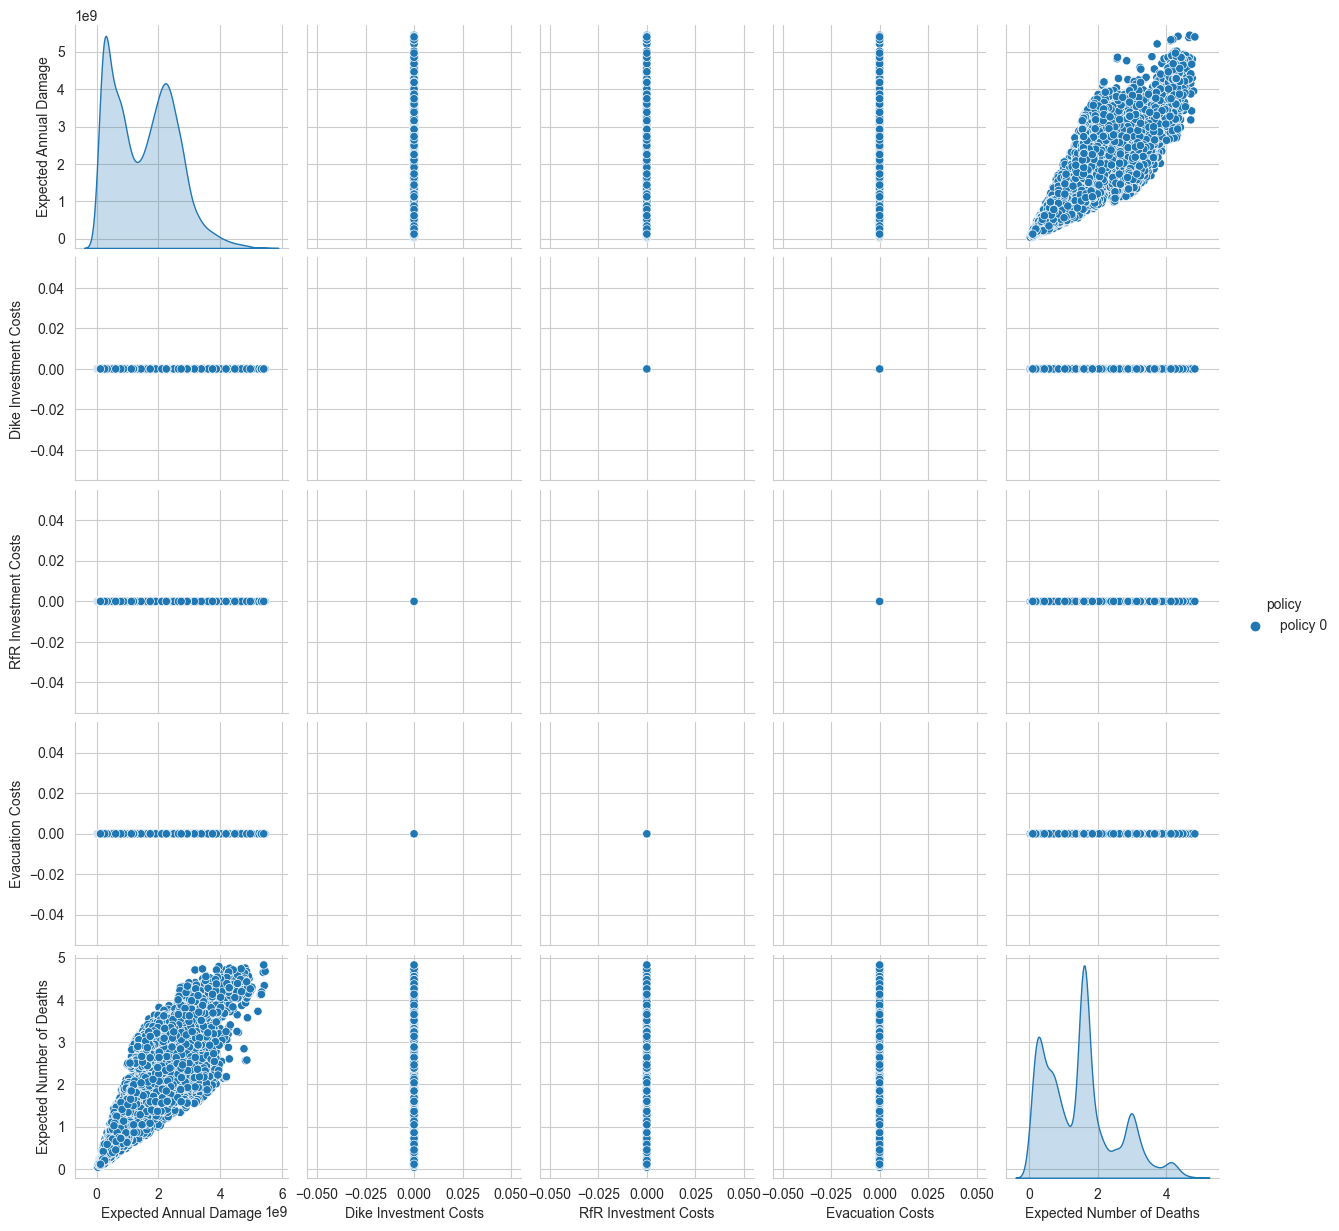

In [7]:
sns.pairplot(outcomes, hue='policy')
plt.show()

Explanation!

# Feature scoring

In [8]:
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

uncertainty_experiments = experiments.loc[:,list_of_uncertainties]
uncertainty_experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,2.5,4.5,1.5,110,334.008648,0.729263,10.0,259.565899,0.673660,10.0,104.948965,0.550382,10.0,198.370991,0.653486,10.0,145.140836,0.889992,10.0
1,3.5,4.5,3.5,56,158.582973,0.641079,10.0,327.393379,0.330776,1.0,253.114312,0.109510,1.5,273.861786,0.859324,1.0,41.255008,0.692840,1.5
2,2.5,4.5,4.5,80,299.733430,0.184624,10.0,281.087283,0.481512,1.0,105.280240,0.930467,1.0,94.898093,0.475867,10.0,254.955270,0.756406,1.0
3,2.5,2.5,3.5,61,151.914404,0.153804,1.5,176.530917,0.630006,10.0,272.552747,0.762337,10.0,212.494144,0.434449,1.0,108.918810,0.123266,10.0
4,4.5,1.5,1.5,80,309.749958,0.422138,1.0,307.063572,0.217711,10.0,331.690263,0.705076,1.5,242.262578,0.815530,10.0,80.963535,0.527218,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.5,1.5,2.5,24,219.930246,0.891368,1.0,275.617704,0.423842,10.0,30.879098,0.889828,10.0,108.256773,0.813547,1.0,131.030426,0.915500,10.0
19996,4.5,1.5,3.5,26,192.896909,0.061889,10.0,150.176897,0.138363,1.5,299.317904,0.466195,1.5,192.212422,0.401485,10.0,113.526934,0.387252,10.0
19997,2.5,3.5,4.5,103,128.071261,0.054128,1.5,110.143125,0.690233,1.5,36.941079,0.445781,1.5,101.379230,0.562266,1.0,144.067864,0.035823,1.0
19998,1.5,2.5,4.5,119,186.803366,0.462298,10.0,125.963852,0.384373,1.0,327.711865,0.702281,10.0,86.548600,0.662147,1.5,141.285189,0.340833,10.0


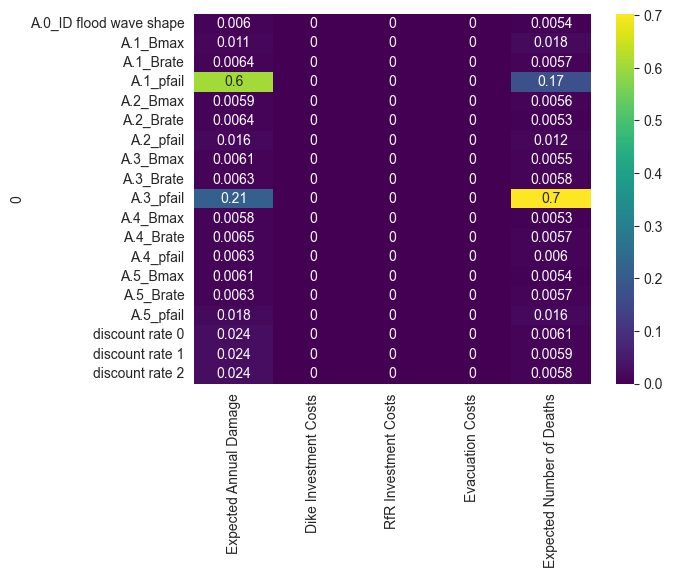

In [9]:
from ema_workbench.analysis import feature_scoring

fs = feature_scoring.get_feature_scores_all(uncertainty_experiments, outcomes.drop(columns='policy'))
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

Explanation!

# Boxplot

<Axes: >

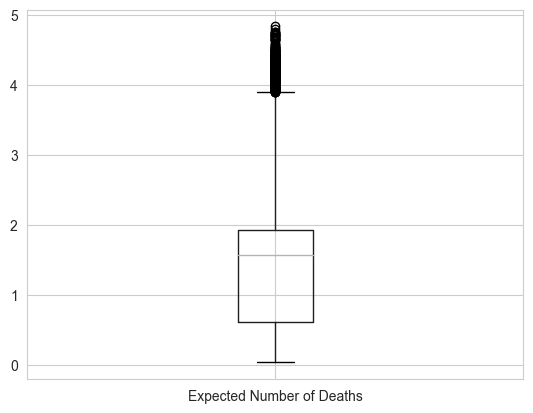

In [10]:
outcomes.boxplot(column = 'Expected Number of Deaths')

<Axes: >

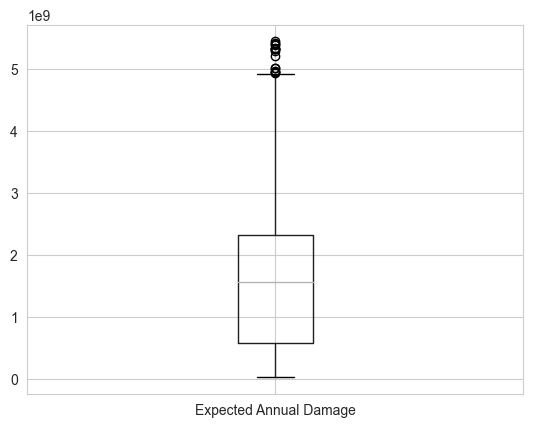

In [11]:
outcomes.boxplot(column='Expected Annual Damage')

# PRIM
### Expected Number of Deaths

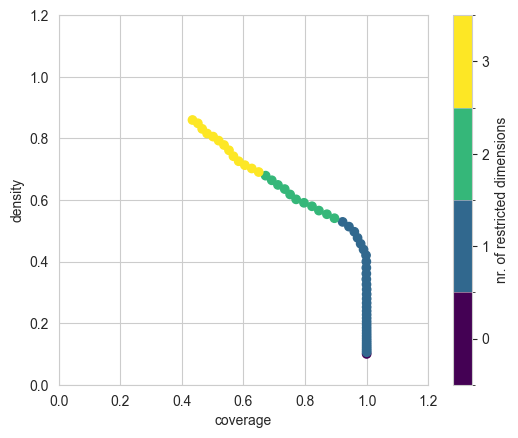

In [12]:
# Expected number of Death (looking at lowest 10%)
from ema_workbench.analysis import prim

x = uncertainty_experiments
y = outcomes['Expected Number of Deaths'] > np.percentile(outcomes['Expected Number of Deaths'],90) #

prim_alg = prim.Prim(x, y, threshold=0.8)
# Peal alpha = default & threshold set to same value as used in assignments
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()




coverage     0.771000
density      0.601874
id          40.000000
mass         0.128100
mean         0.601874
res_dim      2.000000
Name: 40, dtype: float64

             box 40                            
                min       max qp value qp value
A.3_pfail  0.000011  0.149245      NaN  0.00000
A.1_pfail  0.000003  0.852819      NaN  0.00004



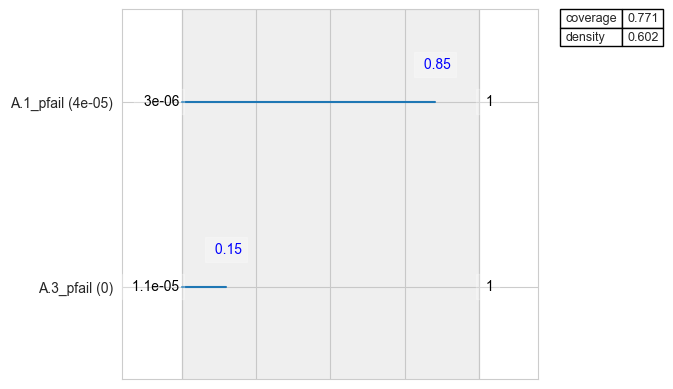

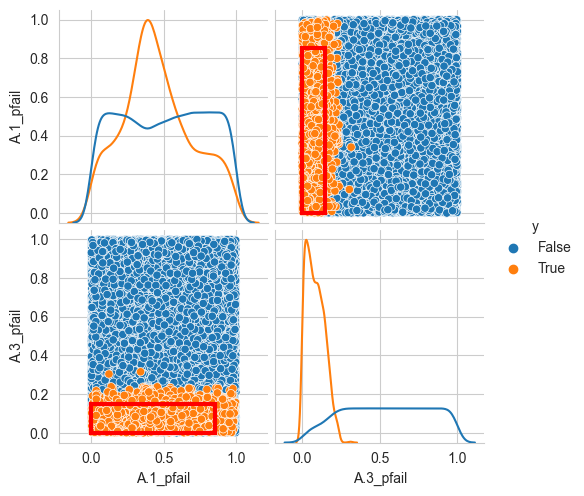

In [13]:
#NOG BEPALEN WELKE BOX WE WILLEN BEKIJKEN!
box1.inspect(40)
box1.inspect(40, style="graph")
box1.show_pairs_scatter(40)
plt.show()

### Expected annual damage

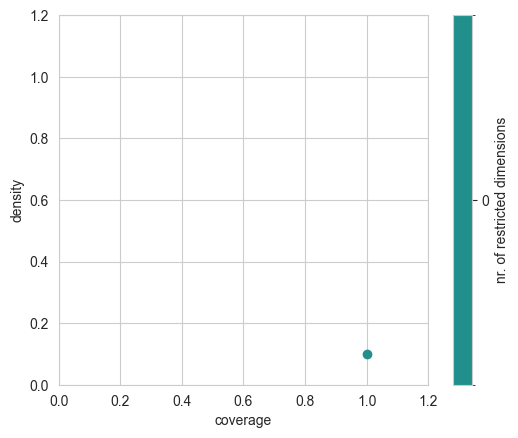

In [14]:
# Expected Expected Annual Damaga (looking at lowest 10%)

x = uncertainty_experiments
y = outcomes['Expected Annual Damage'] > np.percentile(outcomes['Expected Annual Damage'],90) #

prim_alg = prim.Prim(x, y, threshold=0.8)

# Peal alpha = default & threshold set to same value as used in assignments
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

In [15]:
print(np.sum( y == True))

1999


In [16]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Expected Annual Damage, Length: 20000, dtype: bool

coverage    1.00000
density     0.09995
id          0.00000
mass        1.00000
mean        0.09995
res_dim     0.00000
Name: 0, dtype: float64

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp value), (box 0, qp value)]
Index: []



/Users/brittreddingius/Documents/pythonProject2/lib/python3.11/site-packages/ema_workbench/analysis/scenario_discovery_util.py:450: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(top=-0.5, bottom=nr_unc - 0.5)


ValueError: No variables found for grid columns.

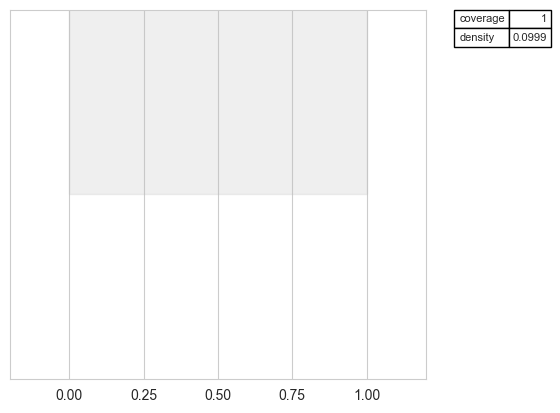

In [17]:
#NOG BEPALEN WELKE BOX WE WILLEN BEKIJKEN!
box1.inspect(0)
box1.inspect(0, style="graph")
box1.show_pairs_scatter(0)
plt.show()

# Dimensional stacking

### Expected Number of Deaths

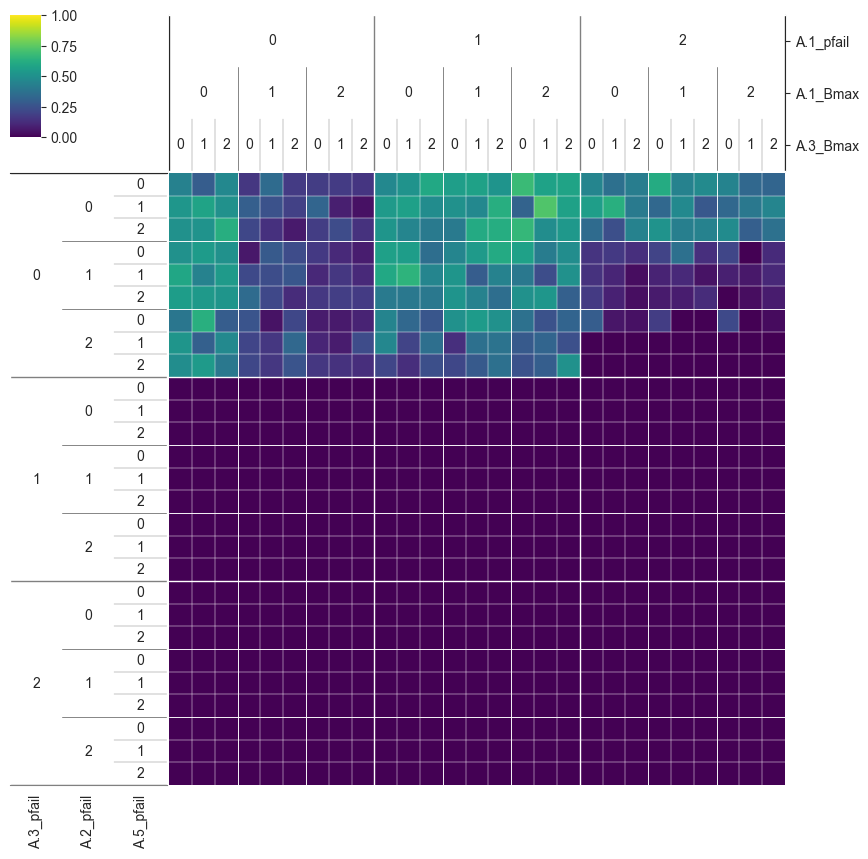

In [18]:
from ema_workbench.analysis import dimensional_stacking

x = uncertainty_experiments
y = outcomes['Expected Number of Deaths'].values > np.percentile(outcomes['Expected Number of Deaths'],90)
dimensional_stacking.create_pivot_plot(x,y)

plt.show()

### Expected Annual Damage

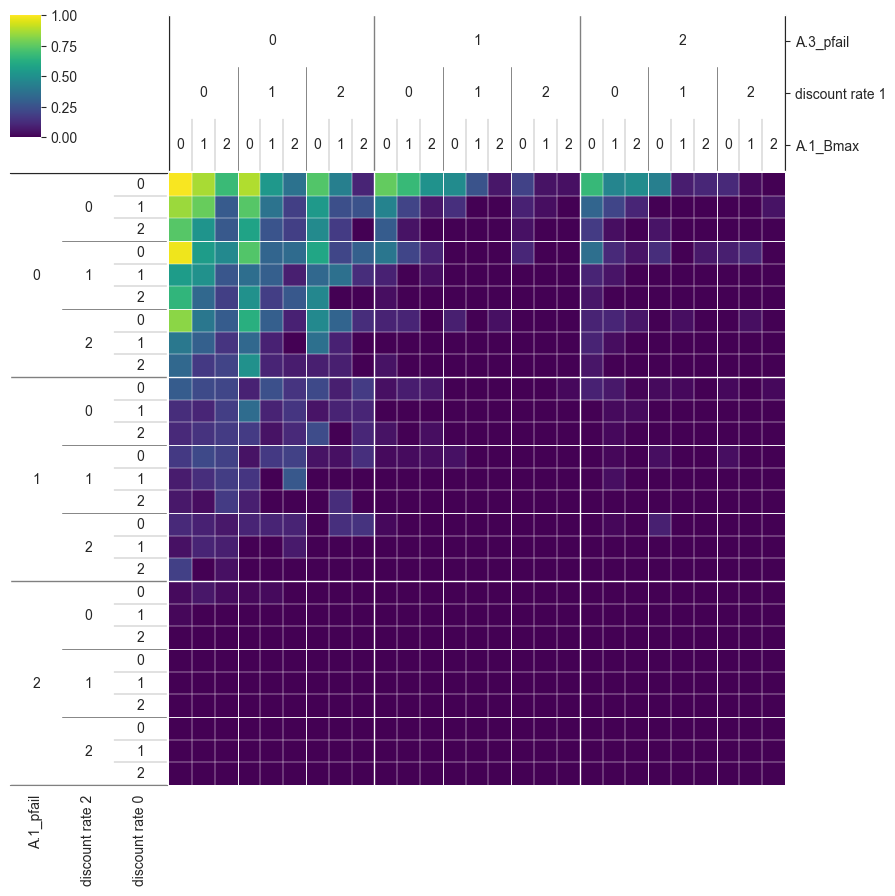

In [19]:
from ema_workbench.analysis import dimensional_stacking

x = uncertainty_experiments
y = outcomes['Expected Annual Damage'].values > np.percentile(outcomes['Expected Annual Damage'],90)
dimensional_stacking.create_pivot_plot(x,y)

plt.show()

# Take the 10 % from database
This means first taking the 10% runs with most deaths and also the 10% with highest expected number of deaths, the one that overlap are shown below.

In [20]:
select_rows = outcomes[(outcomes['Expected Annual Damage']  > np.percentile(outcomes['Expected Annual Damage'],90)) & (outcomes['Expected Number of Deaths']  > np.percentile(outcomes['Expected Number of Deaths'],90))]
select_rows

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
17,4.911994e+09,0,0.0,0.0,4.136661,policy 0
20,3.797252e+09,0,0.0,0.0,4.099225,policy 0
45,2.957861e+09,0,0.0,0.0,3.775428,policy 0
110,3.827840e+09,0,0.0,0.0,3.823023,policy 0
115,3.116357e+09,0,0.0,0.0,3.436386,policy 0
...,...,...,...,...,...,...
19741,3.601799e+09,0,0.0,0.0,4.280394,policy 0
19850,3.867889e+09,0,0.0,0.0,4.382702,policy 0
19887,4.965384e+09,0,0.0,0.0,4.265046,policy 0
19916,3.746208e+09,0,0.0,0.0,4.136554,policy 0


In [21]:
uncertainty_experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,2.5,4.5,1.5,110,334.008648,0.729263,10.0,259.565899,0.673660,10.0,104.948965,0.550382,10.0,198.370991,0.653486,10.0,145.140836,0.889992,10.0
1,3.5,4.5,3.5,56,158.582973,0.641079,10.0,327.393379,0.330776,1.0,253.114312,0.109510,1.5,273.861786,0.859324,1.0,41.255008,0.692840,1.5
2,2.5,4.5,4.5,80,299.733430,0.184624,10.0,281.087283,0.481512,1.0,105.280240,0.930467,1.0,94.898093,0.475867,10.0,254.955270,0.756406,1.0
3,2.5,2.5,3.5,61,151.914404,0.153804,1.5,176.530917,0.630006,10.0,272.552747,0.762337,10.0,212.494144,0.434449,1.0,108.918810,0.123266,10.0
4,4.5,1.5,1.5,80,309.749958,0.422138,1.0,307.063572,0.217711,10.0,331.690263,0.705076,1.5,242.262578,0.815530,10.0,80.963535,0.527218,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.5,1.5,2.5,24,219.930246,0.891368,1.0,275.617704,0.423842,10.0,30.879098,0.889828,10.0,108.256773,0.813547,1.0,131.030426,0.915500,10.0
19996,4.5,1.5,3.5,26,192.896909,0.061889,10.0,150.176897,0.138363,1.5,299.317904,0.466195,1.5,192.212422,0.401485,10.0,113.526934,0.387252,10.0
19997,2.5,3.5,4.5,103,128.071261,0.054128,1.5,110.143125,0.690233,1.5,36.941079,0.445781,1.5,101.379230,0.562266,1.0,144.067864,0.035823,1.0
19998,1.5,2.5,4.5,119,186.803366,0.462298,10.0,125.963852,0.384373,1.0,327.711865,0.702281,10.0,86.548600,0.662147,1.5,141.285189,0.340833,10.0


In [22]:
merged = pd.merge(select_rows , uncertainty_experiments , left_index=True, right_index=True)
merged

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,...,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
17,4.911994e+09,0,0.0,0.0,4.136661,policy 0,1.5,1.5,2.5,67,...,1.5,349.233710,0.035428,1.0,253.927422,0.202190,10.0,104.836761,0.214998,1.0
20,3.797252e+09,0,0.0,0.0,4.099225,policy 0,2.5,1.5,4.5,101,...,1.0,274.338833,0.018242,1.5,144.291684,0.370798,10.0,82.104209,0.925129,1.5
45,2.957861e+09,0,0.0,0.0,3.775428,policy 0,4.5,4.5,2.5,25,...,1.5,262.892459,0.093018,10.0,185.121680,0.269186,10.0,195.324428,0.230689,1.5
110,3.827840e+09,0,0.0,0.0,3.823023,policy 0,4.5,1.5,2.5,65,...,10.0,145.642449,0.109428,1.5,268.446065,0.235775,1.0,233.183022,0.658142,10.0
115,3.116357e+09,0,0.0,0.0,3.436386,policy 0,4.5,3.5,1.5,51,...,1.0,310.444270,0.190020,10.0,169.472283,0.511322,1.0,332.371805,0.995548,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19741,3.601799e+09,0,0.0,0.0,4.280394,policy 0,3.5,3.5,2.5,106,...,10.0,265.233252,0.056281,1.5,232.587935,0.434337,10.0,110.382247,0.687507,10.0
19850,3.867889e+09,0,0.0,0.0,4.382702,policy 0,1.5,4.5,3.5,59,...,1.5,349.867167,0.051040,1.5,291.094473,0.116659,1.5,243.904135,0.418764,1.5
19887,4.965384e+09,0,0.0,0.0,4.265046,policy 0,1.5,2.5,1.5,90,...,10.0,237.186599,0.014237,1.5,69.681524,0.660992,1.5,292.246767,0.060345,10.0
19916,3.746208e+09,0,0.0,0.0,4.136554,policy 0,4.5,2.5,1.5,108,...,1.0,177.682715,0.003523,1.5,303.115989,0.299354,1.0,338.730651,0.629892,10.0


In [23]:
merged.describe()

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,...,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
count,8.590000e+02,859.0,859.0,859.0,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,...,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,3.667873e+09,0.0,0.0,0.0,3.927102,2.869034,2.841094,2.860885,65.850990,159.951153,...,4.137369,184.283982,0.074370,4.212456,192.307562,0.510335,4.144354,186.641660,0.502243,4.143190
std,5.610963e+08,0.0,0.0,0.0,0.395837,1.147622,1.109957,1.062239,38.563194,94.841561,...,4.127667,92.400278,0.056399,4.139183,93.412136,0.291422,4.133566,91.403513,0.296887,4.134381
min,2.814759e+09,0.0,0.0,0.0,3.010844,1.500000,1.500000,1.500000,0.000000,30.243132,...,1.000000,30.597242,0.000011,1.000000,31.329845,0.000462,1.000000,30.258805,0.000653,1.000000
25%,3.214609e+09,0.0,0.0,0.0,3.671277,1.500000,1.500000,1.500000,32.500000,73.209329,...,1.000000,99.974312,0.027171,1.000000,108.998912,0.253576,1.000000,104.071182,0.234658,1.000000
50%,3.605588e+09,0.0,0.0,0.0,4.058861,2.500000,2.500000,2.500000,65.000000,140.047992,...,1.500000,180.353237,0.060721,1.500000,194.326365,0.506707,1.500000,180.562534,0.519899,1.500000
75%,4.032410e+09,0.0,0.0,0.0,4.195363,3.500000,3.500000,3.500000,99.000000,242.703804,...,10.000000,263.413757,0.111658,10.000000,273.774788,0.763834,10.000000,265.675763,0.759849,10.000000
max,5.444562e+09,0.0,0.0,0.0,4.831089,4.500000,4.500000,4.500000,132.000000,349.748315,...,10.000000,349.917599,0.315875,10.000000,349.670123,0.999596,10.000000,349.815123,0.997121,10.000000


In [24]:
uncertainty_col_merged = merged.loc[:,list_of_uncertainties]

In [25]:
uncertainty_col_merged.mean(axis=0)

discount rate 0              2.869034
discount rate 1              2.841094
discount rate 2              2.860885
A.0_ID flood wave shape     65.850990
A.1_Bmax                   159.951153
A.1_pfail                    0.259789
A.1_Brate                    4.181024
A.2_Bmax                   188.431392
A.2_pfail                    0.473059
A.2_Brate                    4.137369
A.3_Bmax                   184.283982
A.3_pfail                    0.074370
A.3_Brate                    4.212456
A.4_Bmax                   192.307562
A.4_pfail                    0.510335
A.4_Brate                    4.144354
A.5_Bmax                   186.641660
A.5_pfail                    0.502243
A.5_Brate                    4.143190
dtype: float64

In [26]:
merged.sort_values(by=['Expected Number of Deaths','Expected Annual Damage'],ascending =False)

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,...,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
19230,5.398797e+09,0,0.0,0.0,4.831089,policy 0,2.5,1.5,2.5,84,...,10.0,144.892621,0.014424,1.5,54.891473,0.495488,1.0,146.862032,0.612757,1.5
8599,3.950205e+09,0,0.0,0.0,4.796660,policy 0,3.5,4.5,2.5,2,...,1.5,201.508005,0.136139,10.0,339.721597,0.478679,1.0,232.909125,0.897644,1.0
2519,4.799329e+09,0,0.0,0.0,4.758214,policy 0,1.5,4.5,2.5,26,...,10.0,58.209407,0.076599,10.0,46.401387,0.264039,1.5,94.740412,0.161067,1.0
5676,4.299947e+09,0,0.0,0.0,4.754717,policy 0,4.5,2.5,2.5,32,...,1.0,297.508156,0.055397,1.0,178.664455,0.774363,10.0,163.541613,0.039032,1.5
9220,4.668589e+09,0,0.0,0.0,4.739324,policy 0,1.5,3.5,3.5,40,...,1.0,48.140499,0.026304,1.0,96.573494,0.024607,10.0,134.949328,0.443684,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950,3.261906e+09,0,0.0,0.0,3.033333,policy 0,3.5,1.5,3.5,67,...,10.0,30.947999,0.123624,1.0,299.194934,0.260091,1.5,139.840055,0.765299,10.0
3381,3.716456e+09,0,0.0,0.0,3.028829,policy 0,2.5,2.5,1.5,50,...,1.5,145.170912,0.232039,10.0,66.959127,0.137609,1.0,58.647654,0.905209,10.0
2884,4.056349e+09,0,0.0,0.0,3.021566,policy 0,1.5,1.5,2.5,71,...,1.0,149.340658,0.128551,10.0,325.790522,0.033906,1.5,105.879250,0.639680,1.0
18673,3.837263e+09,0,0.0,0.0,3.014165,policy 0,1.5,3.5,2.5,90,...,1.5,250.782931,0.304368,10.0,70.081464,0.373644,1.0,122.096417,0.015824,1.5


Maximized for Expected Number of Deaths & Expected Annual Damage, so flood wave shape selected for worst case; 84

## Plaatjes voor verslag genereren

In [28]:
select_rows_deaths =  outcomes[(outcomes['Expected Number of Deaths']  > np.percentile(outcomes['Expected Number of Deaths'],90))]
select_rows_deaths

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
1,1.507760e+09,0,0.0,0.0,3.087211,policy 0
17,4.911994e+09,0,0.0,0.0,4.136661,policy 0
20,3.797252e+09,0,0.0,0.0,4.099225,policy 0
30,1.468426e+09,0,0.0,0.0,3.145591,policy 0
45,2.957861e+09,0,0.0,0.0,3.775428,policy 0
...,...,...,...,...,...,...
19938,1.588695e+09,0,0.0,0.0,3.027658,policy 0
19986,2.454714e+09,0,0.0,0.0,3.100466,policy 0
19988,2.495531e+09,0,0.0,0.0,3.246071,policy 0
19990,1.733700e+09,0,0.0,0.0,3.140194,policy 0


In [39]:
select_rows_damage =  outcomes[(outcomes['Expected Annual Damage']  > np.percentile(outcomes['Expected Annual Damage'],90))]
select_rows_damage

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
17,4.911994e+09,0,0.0,0.0,4.136661,policy 0
18,2.906429e+09,0,0.0,0.0,1.545486,policy 0
20,3.797252e+09,0,0.0,0.0,4.099225,policy 0
37,3.634790e+09,0,0.0,0.0,1.840605,policy 0
38,3.252697e+09,0,0.0,0.0,1.649808,policy 0
...,...,...,...,...,...,...
19916,3.746208e+09,0,0.0,0.0,4.136554,policy 0
19931,3.382589e+09,0,0.0,0.0,3.517918,policy 0
19936,3.157847e+09,0,0.0,0.0,1.553639,policy 0
19973,2.937095e+09,0,0.0,0.0,1.581973,policy 0


<Axes: >

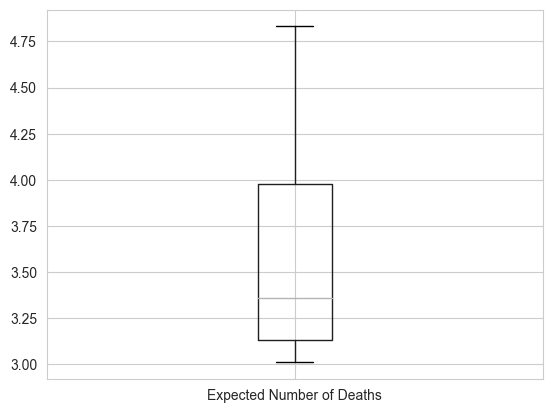

In [29]:
select_rows_deaths.boxplot(column='Expected Number of Deaths')

<Axes: >

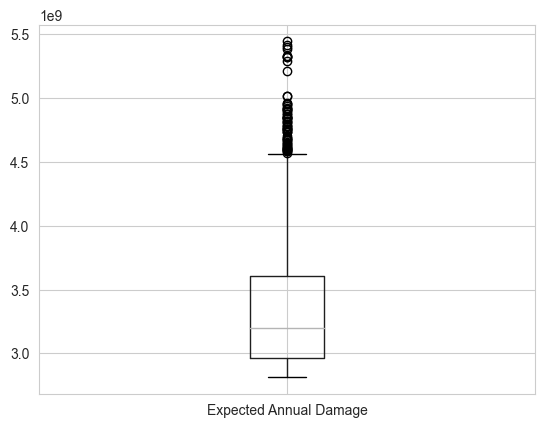

In [40]:
select_rows_damage.boxplot(column='Expected Annual Damage')

In [35]:
select_rows_deaths_lowest =  outcomes[(outcomes['Expected Number of Deaths']  < np.percentile(outcomes['Expected Number of Deaths'],10))]
select_rows_deaths_lowest

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
9,1.681093e+08,0,0.0,0.0,0.168421,policy 0
12,1.368405e+08,0,0.0,0.0,0.090493,policy 0
19,4.125446e+08,0,0.0,0.0,0.229451,policy 0
47,2.496532e+08,0,0.0,0.0,0.153339,policy 0
64,1.416029e+08,0,0.0,0.0,0.182824,policy 0
...,...,...,...,...,...,...
19964,2.041146e+08,0,0.0,0.0,0.233937,policy 0
19978,1.987401e+08,0,0.0,0.0,0.147178,policy 0
19981,1.296684e+08,0,0.0,0.0,0.089049,policy 0
19994,2.638249e+08,0,0.0,0.0,0.200288,policy 0


In [42]:
select_rows_damage_lowest =  outcomes[(outcomes['Expected Annual Damage']  < np.percentile(outcomes['Expected Annual Damage'],10))]
select_rows_deaths_lowest

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
9,1.681093e+08,0,0.0,0.0,0.168421,policy 0
12,1.368405e+08,0,0.0,0.0,0.090493,policy 0
19,4.125446e+08,0,0.0,0.0,0.229451,policy 0
47,2.496532e+08,0,0.0,0.0,0.153339,policy 0
64,1.416029e+08,0,0.0,0.0,0.182824,policy 0
...,...,...,...,...,...,...
19964,2.041146e+08,0,0.0,0.0,0.233937,policy 0
19978,1.987401e+08,0,0.0,0.0,0.147178,policy 0
19981,1.296684e+08,0,0.0,0.0,0.089049,policy 0
19994,2.638249e+08,0,0.0,0.0,0.200288,policy 0


<Axes: >

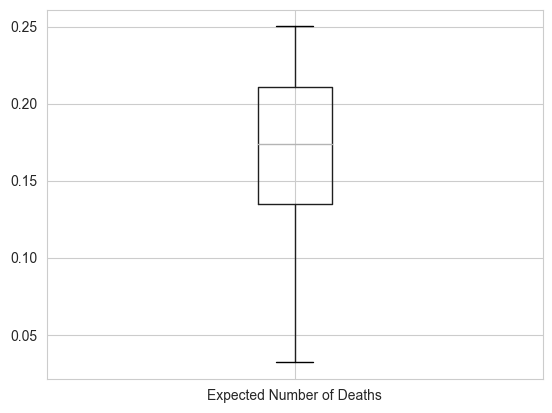

In [36]:
select_rows_deaths_lowest.boxplot(column='Expected Number of Deaths')

<Axes: >

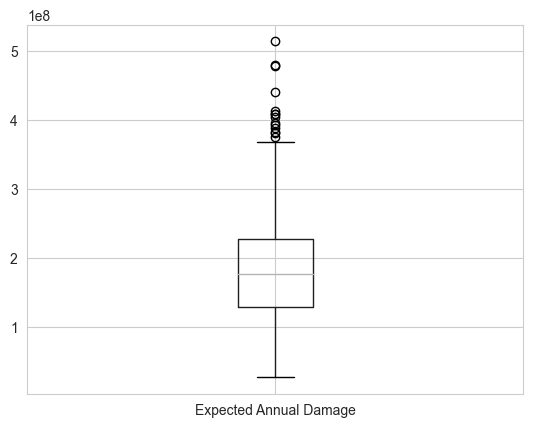

In [43]:
select_rows_deaths_lowest.boxplot(column='Expected Annual Damage')

<Axes: >

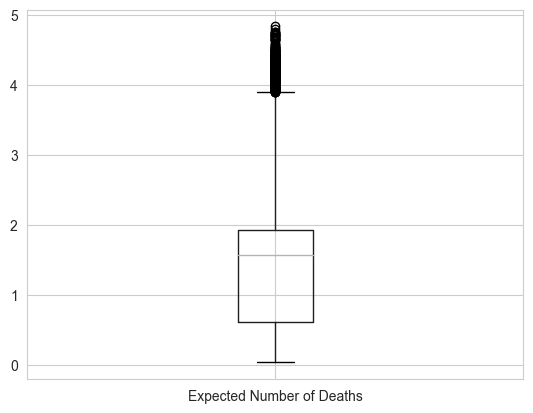

In [37]:
outcomes.boxplot(column='Expected Number of Deaths')

<Axes: >

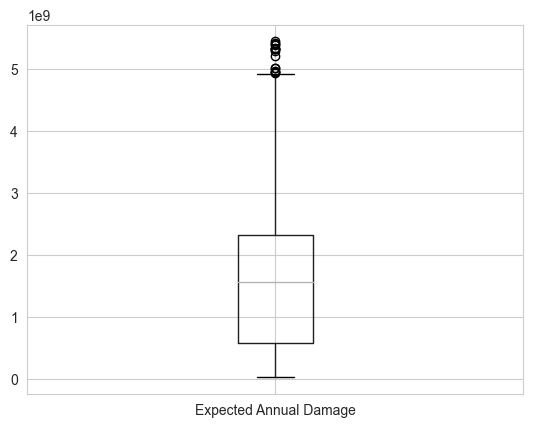

In [45]:
outcomes.boxplot(column='Expected Annual Damage')